In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/Users/gustagul/Desktop/forecast_model/municipality_bus_utilization.csv')

## DATA PREPARATION AND ANALYSIS

In [2]:
df.head()

,timestamp,municipality_id,usage,total_capacity
0,2017-06-04 07:59:42,9,454,1332
1,2017-06-04 07:59:42,8,556,2947
2,2017-06-04 07:59:42,4,1090,3893
3,2017-06-04 07:59:42,0,204,2813
4,2017-06-04 07:59:42,7,718,2019


In [3]:
df.describe()

,municipality_id,usage,total_capacity
count,13070.000000,13070.000000,13070.000000
mean,4.500000,876.002984,1972.800000
std,2.872391,679.287109,1144.074782
min,0.000000,11.000000,397.000000
25%,2.000000,403.000000,697.000000
50%,4.500000,692.000000,1974.500000
75%,7.000000,1190.000000,2947.000000
max,9.000000,3508.000000,3893.000000


In [4]:
df.dtypes

timestamp          object
municipality_id     int64
usage               int64
total_capacity      int64
dtype: object

In [5]:
df['municipality_id'] = df['municipality_id'].astype('category')

In [6]:
df.dtypes

timestamp            object
municipality_id    category
usage                 int64
total_capacity        int64
dtype: object

<AxesSubplot:xlabel='usage', ylabel='municipality_id'>

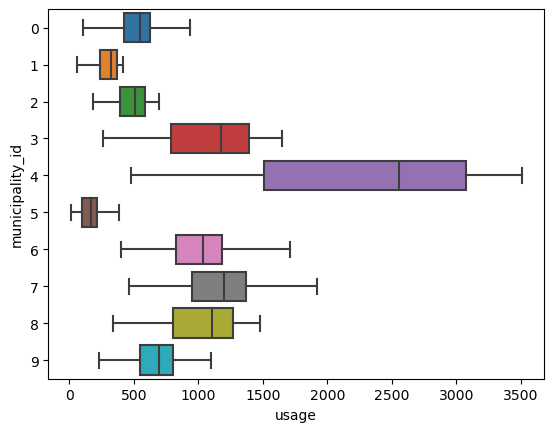

In [7]:
sns.boxplot(x='usage', y='municipality_id', data=df,showfliers=False)

<AxesSubplot:xlabel='municipality_id'>

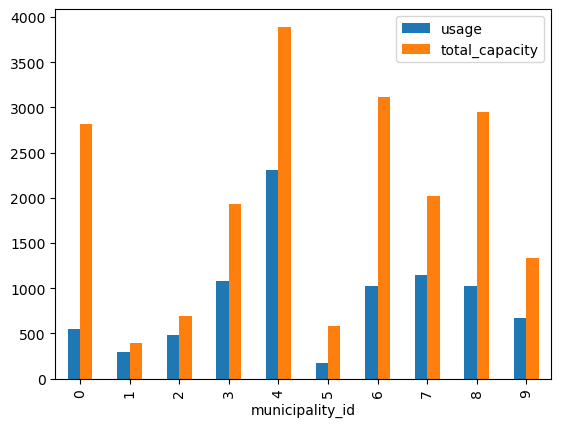

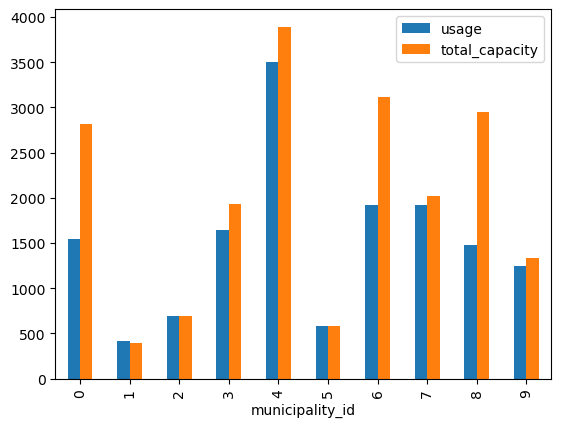

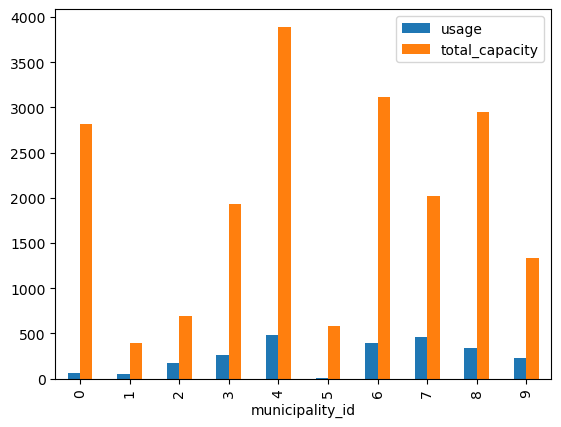

In [8]:
df.groupby(['municipality_id']).mean().plot(kind='bar')
df.groupby(['municipality_id']).max().plot(kind='bar')
df.groupby(['municipality_id']).min().plot(kind='bar')

In [9]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [10]:
df.dtypes

timestamp          datetime64[ns]
municipality_id          category
usage                       int64
total_capacity              int64
dtype: object

In [11]:
df.isna().sum()

timestamp          0
municipality_id    0
usage              0
total_capacity     0
dtype: int64

In [12]:
df["dates"] = df["timestamp"].dt.date
df["times"] = df["timestamp"].dt.time

In [13]:
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["day"] = df["timestamp"].dt.day
df["weekday"] = df["timestamp"].dt.weekday
df["hour"] = df["timestamp"].dt.hour

In [15]:
#taking the max for the usage in the same hour
df_new=df.groupby(['municipality_id','dates','hour']).max('usage').reset_index()

In [16]:
#for testing
df[(df.municipality_id == 9)& (df.hour == 8)]

,timestamp,municipality_id,usage,total_capacity,dates,times,year,month,day,weekday,hour
11,2017-06-04 08:25:42,9,487,1332,2017-06-04,08:25:42,2017,6,4,6,8
21,2017-06-04 08:59:42,9,527,1332,2017-06-04,08:59:42,2017,6,4,6,8
195,2017-06-05 08:30:15,9,496,1332,2017-06-05,08:30:15,2017,6,5,0,8
375,2017-06-06 08:30:20,9,470,1332,2017-06-06,08:30:20,2017,6,6,1,8
381,2017-06-06 08:57:22,9,502,1332,2017-06-06,08:57:22,2017,6,6,1,8
...,...,...,...,...,...,...,...,...,...,...,...
12714,2017-08-18 08:03:24,9,350,1332,2017-08-18,08:03:24,2017,8,18,4,8
12726,2017-08-18 08:30:20,9,350,1332,2017-08-18,08:30:20,2017,8,18,4,8
12738,2017-08-18 08:56:20,9,360,1332,2017-08-18,08:56:20,2017,8,18,4,8
12894,2017-08-19 08:03:29,9,319,1332,2017-08-19,08:03:29,2017,8,19,5,8


In [17]:
#for testing
df_new[(df_new.municipality_id == 9)& (df_new.hour == 8)]

,municipality_id,dates,hour,usage,total_capacity,year,month,day,weekday
6481,9,2017-06-04,8,527.0,1332.0,2017.0,6.0,4.0,6.0
6491,9,2017-06-05,8,496.0,1332.0,2017.0,6.0,5.0,0.0
6501,9,2017-06-06,8,502.0,1332.0,2017.0,6.0,6.0,1.0
6511,9,2017-06-07,8,437.0,1332.0,2017.0,6.0,7.0,2.0
6521,9,2017-06-08,8,366.0,1332.0,2017.0,6.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...
7151,9,2017-08-15,8,447.0,1332.0,2017.0,8.0,15.0,1.0
7161,9,2017-08-16,8,518.0,1332.0,2017.0,8.0,16.0,2.0
7171,9,2017-08-17,8,403.0,1332.0,2017.0,8.0,17.0,3.0
7181,9,2017-08-18,8,360.0,1332.0,2017.0,8.0,18.0,4.0


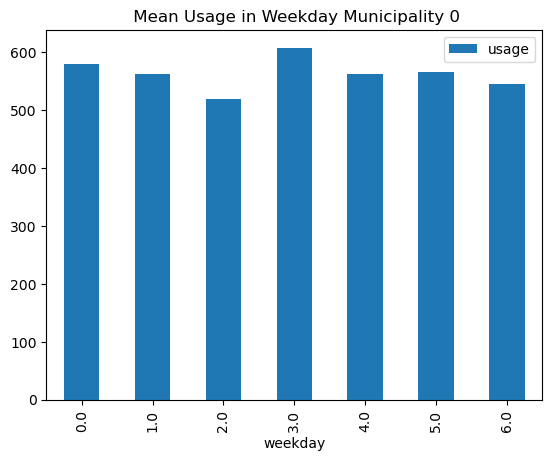

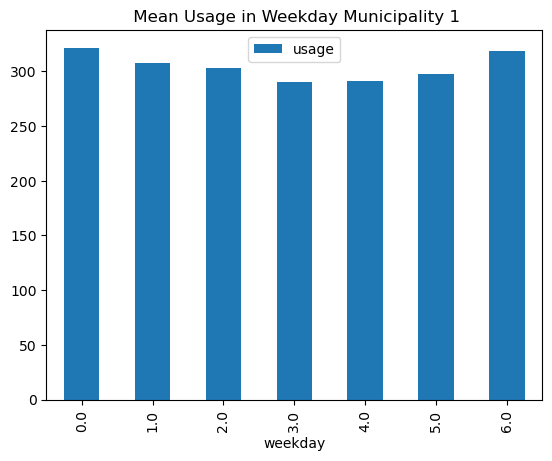

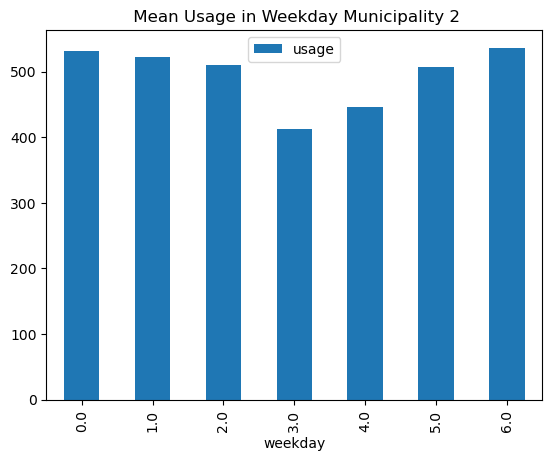

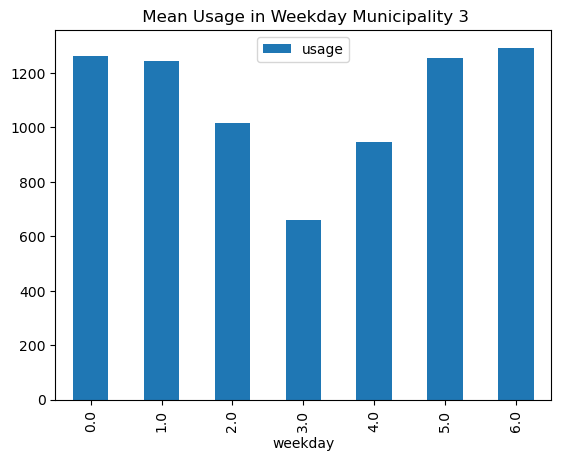

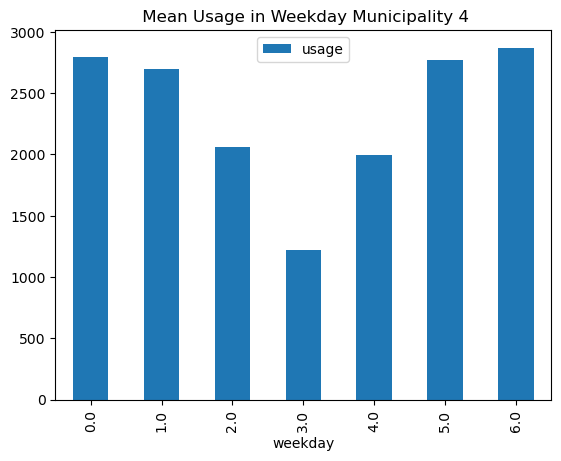

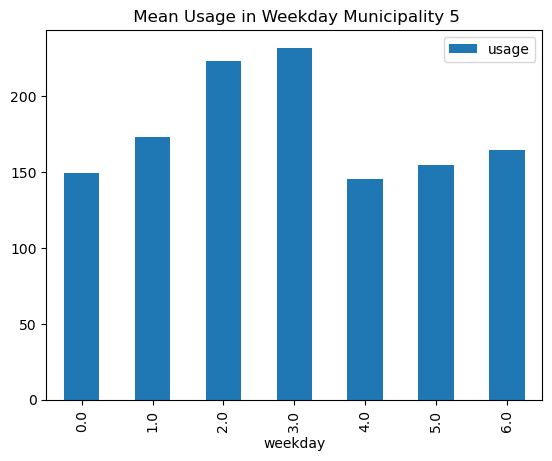

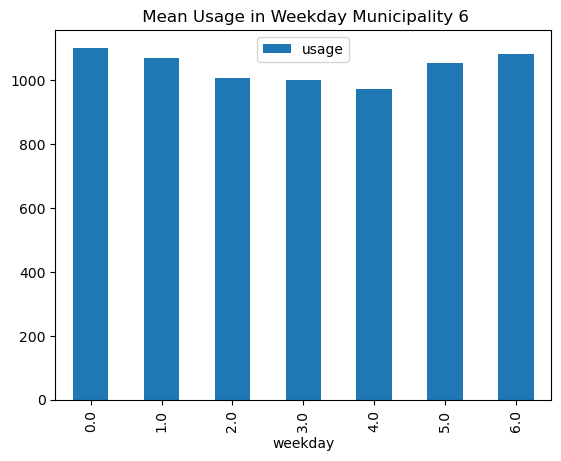

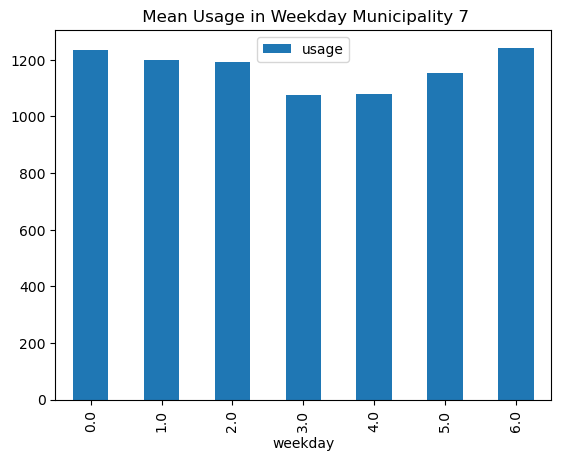

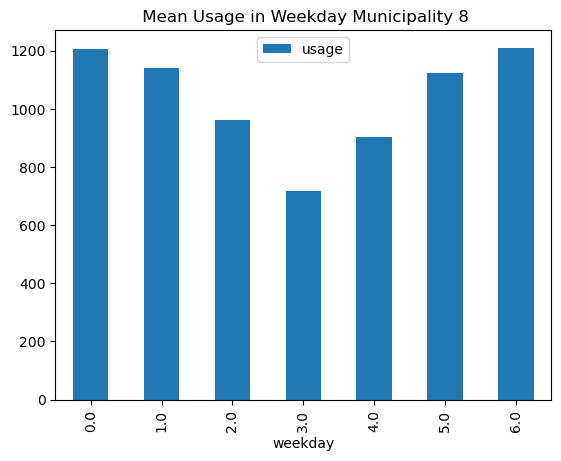

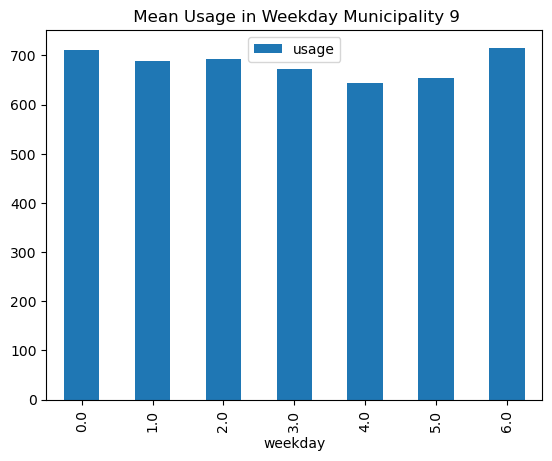

In [18]:
grouped = df_new.groupby('municipality_id')

for name, group in grouped:
    newdf = df_new[(df_new.municipality_id == name)]
    newdf.groupby(['weekday']).mean('usage').plot(kind='bar',y='usage',title=' Mean Usage in Weekday Municipality '+str(name))
    #newdf.mean('usage').plot(kind='bar',x='weekday',y='usage')

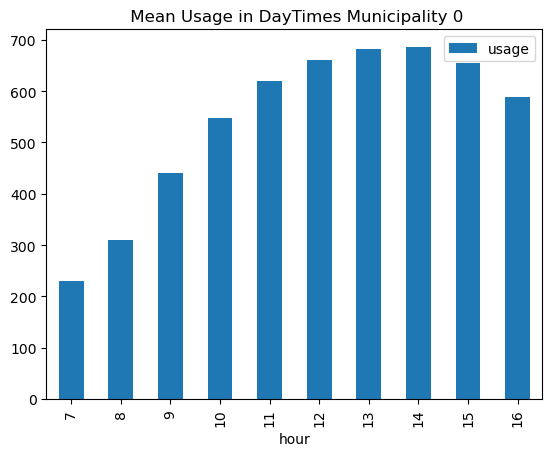

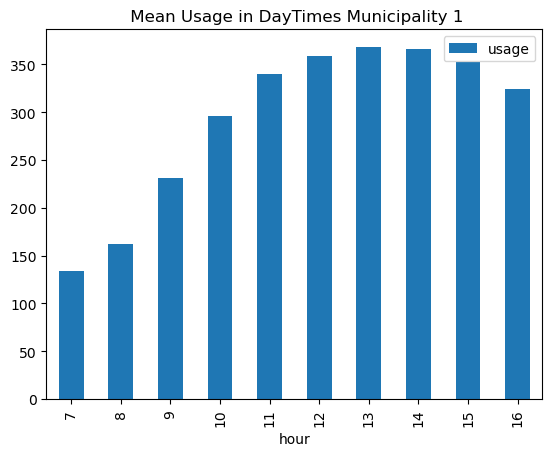

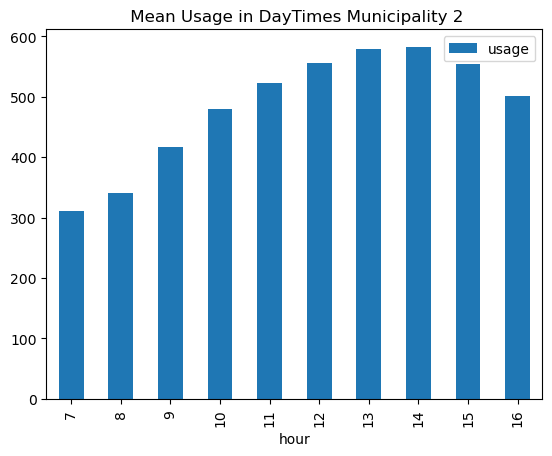

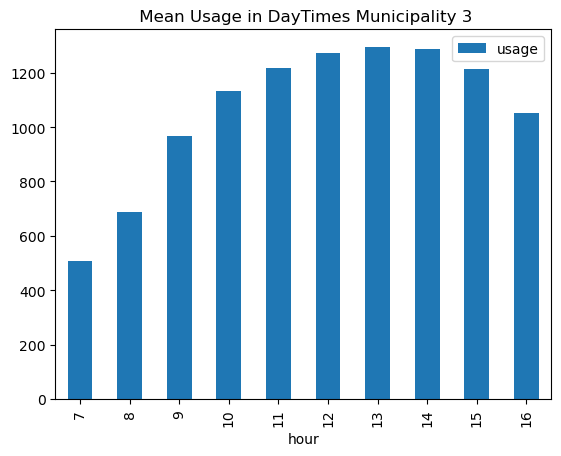

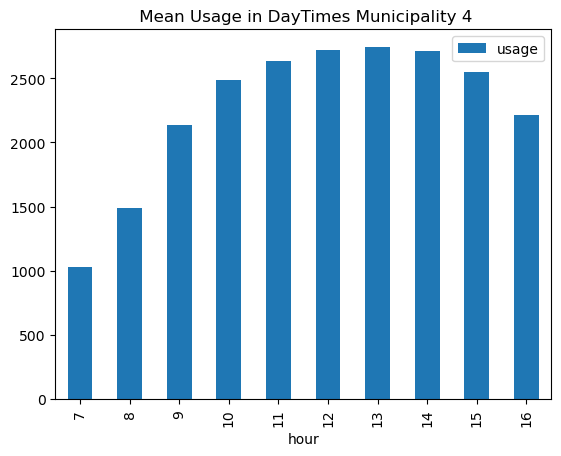

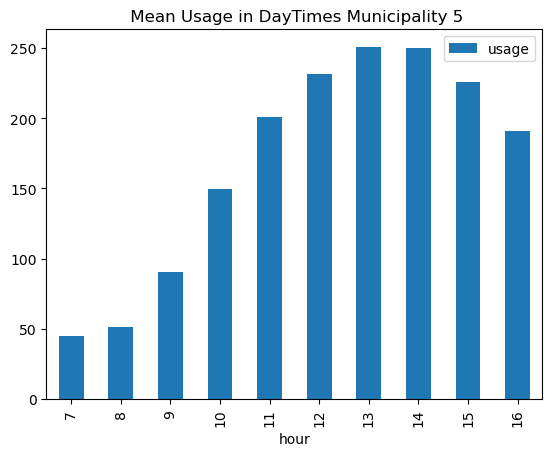

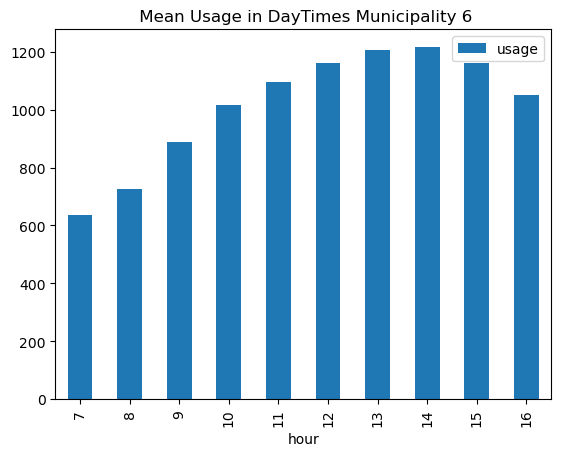

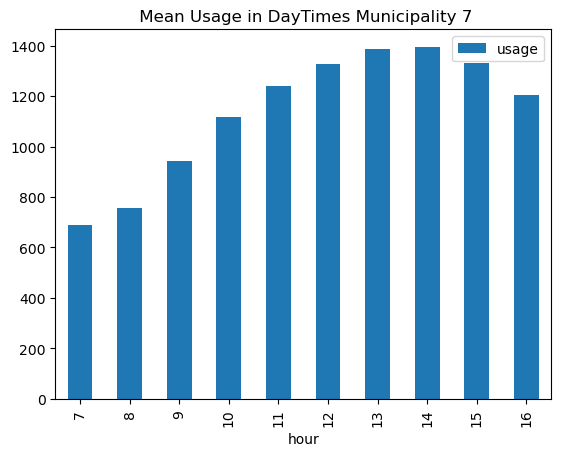

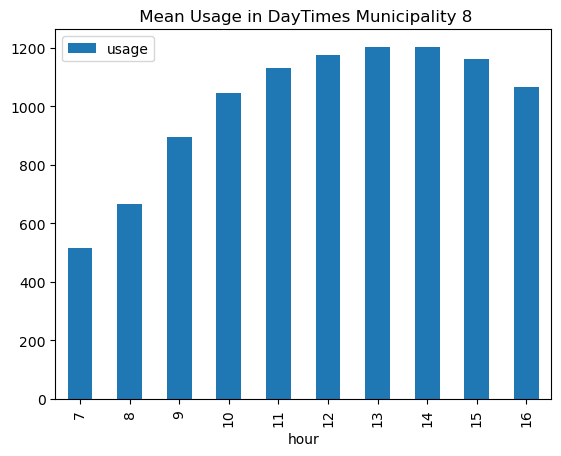

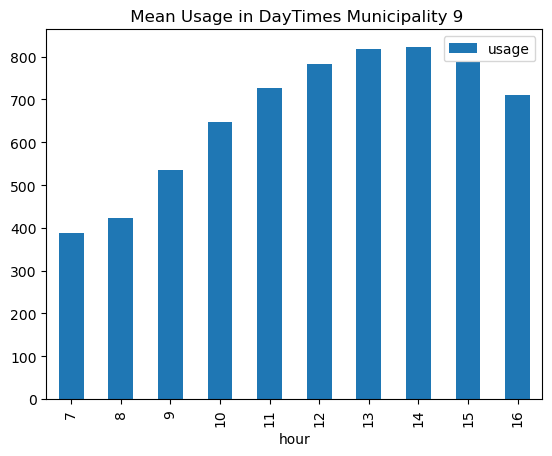

In [19]:
for name, group in grouped:
    newdf = df_new[(df_new.municipality_id == name)]
    newdf.groupby(['hour']).mean('usage').plot(kind='bar',y='usage',title=' Mean Usage in DayTimes Municipality '+str(name))
    #newdf.mean('usage').plot(kind='bar',x='weekday',y='usage')

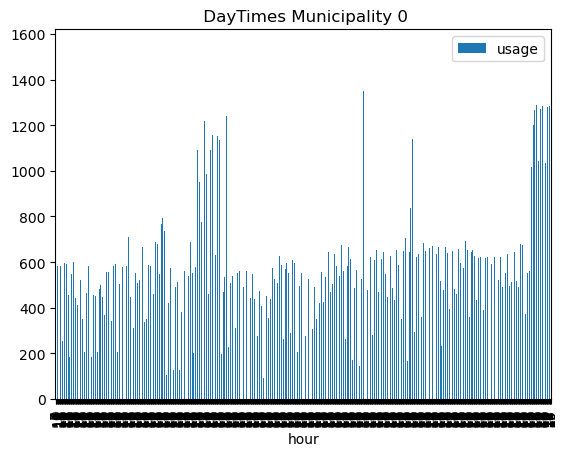

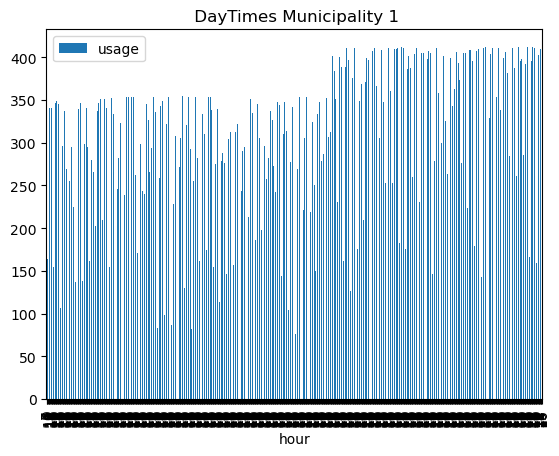

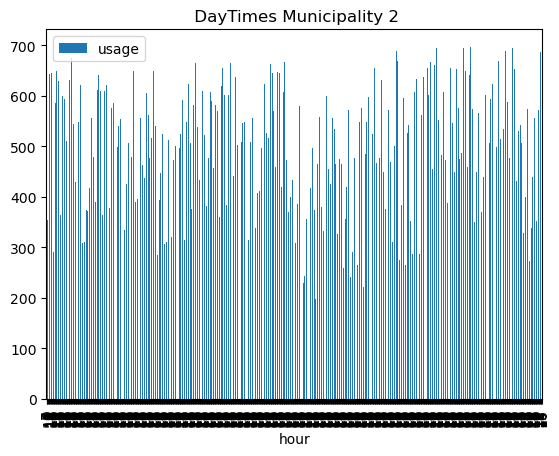

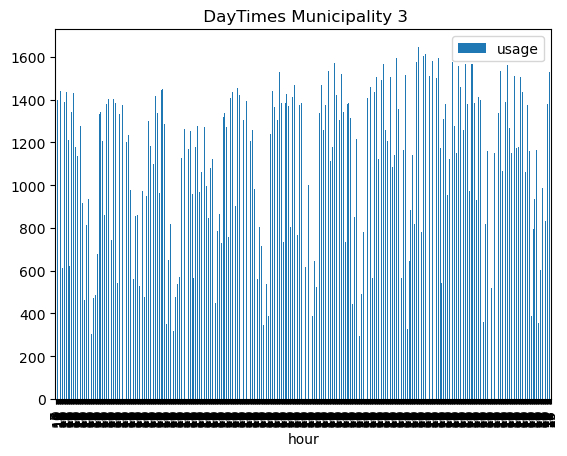

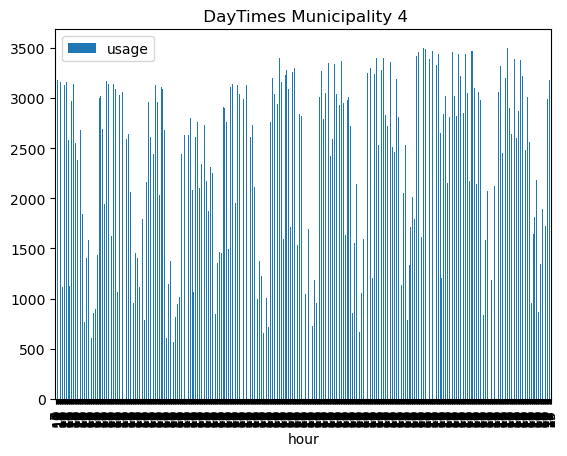

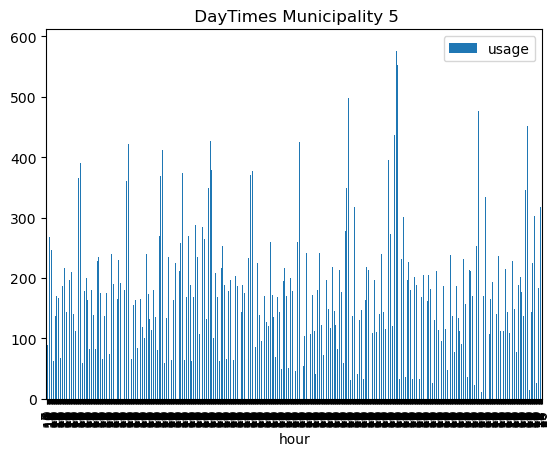

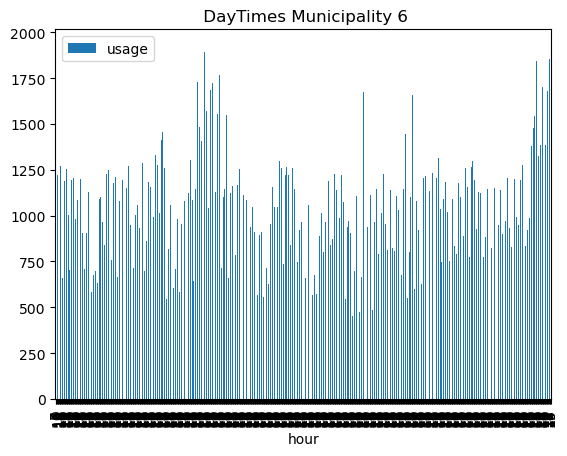

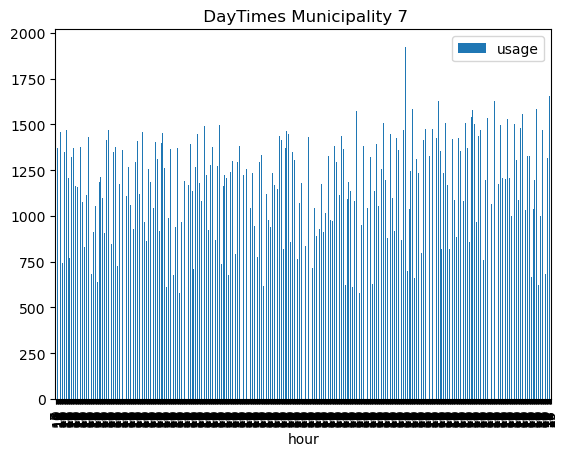

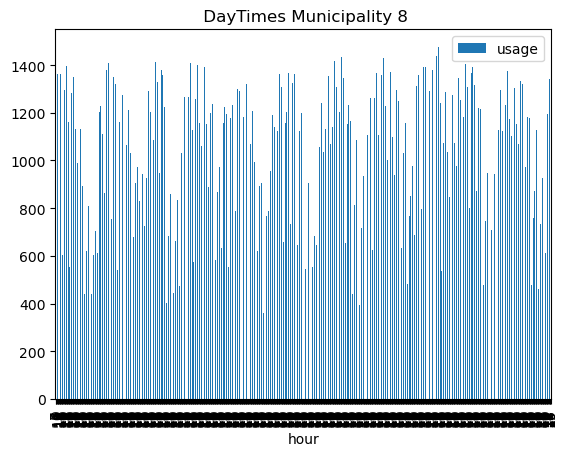

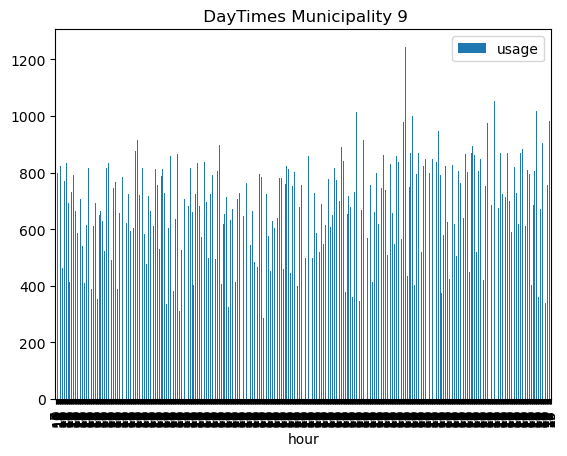

In [20]:
for name, group in grouped:
    newdf = df_new[(df_new.municipality_id == name)]
    newdf.plot(kind='bar',y='usage',x='hour',title=' DayTimes Municipality '+str(name))
    #newdf.mean('usage').plot(kind='bar',x='weekday',y='usage')

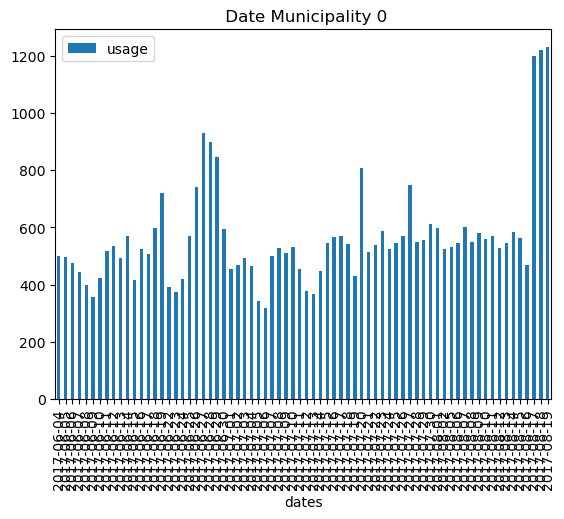

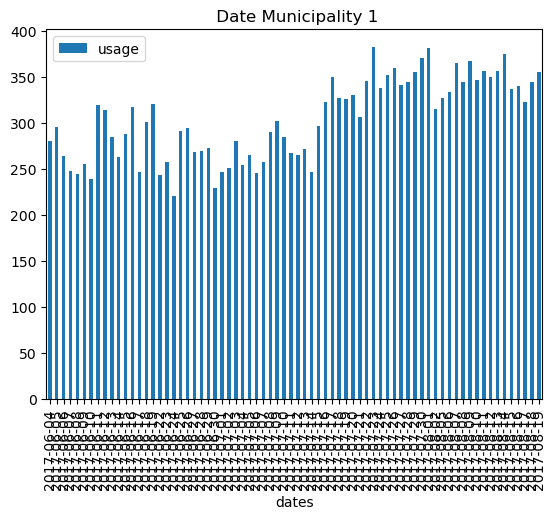

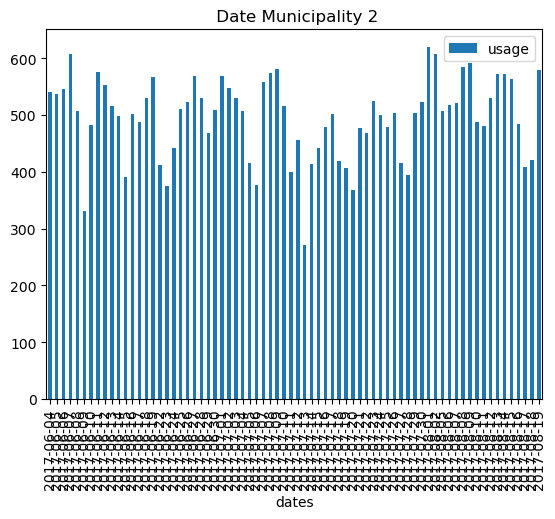

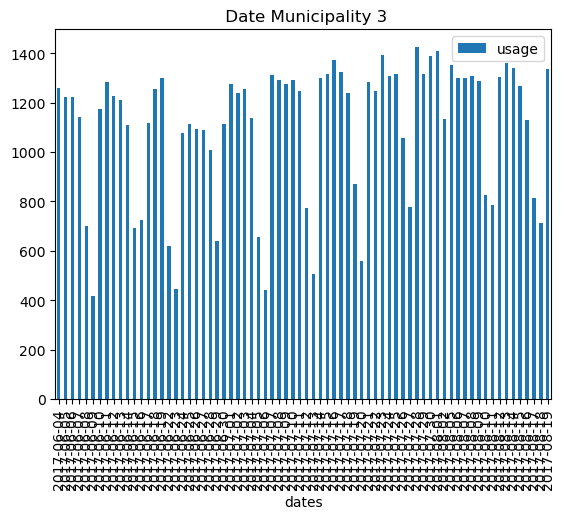

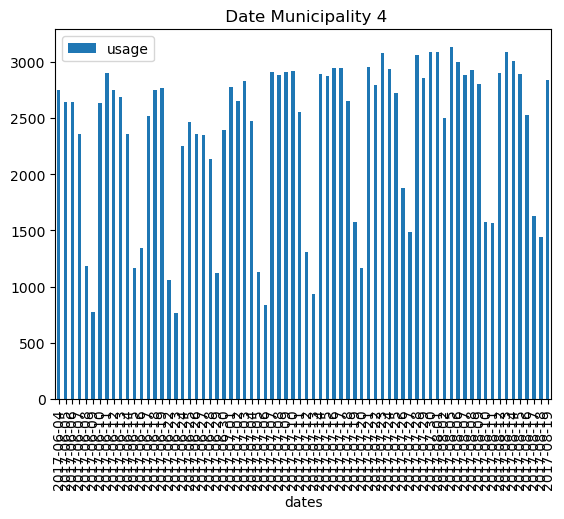

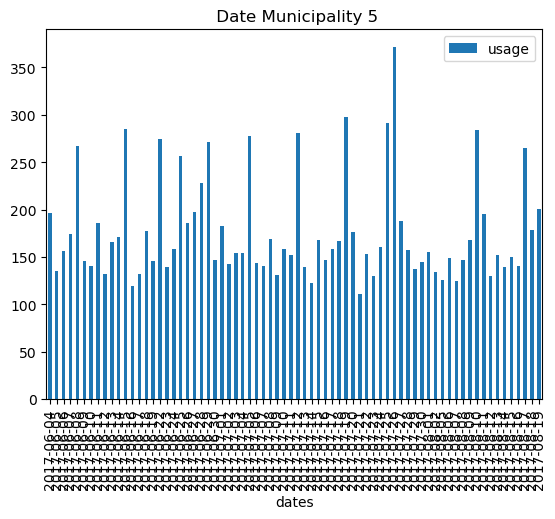

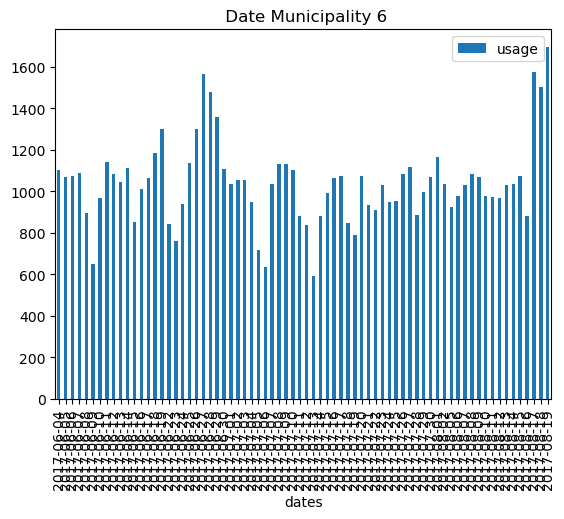

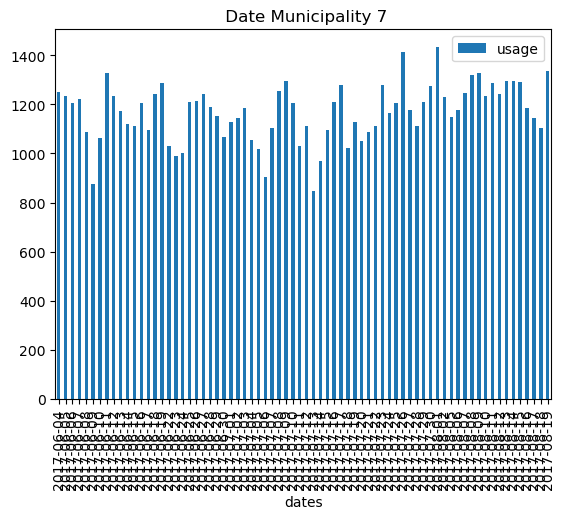

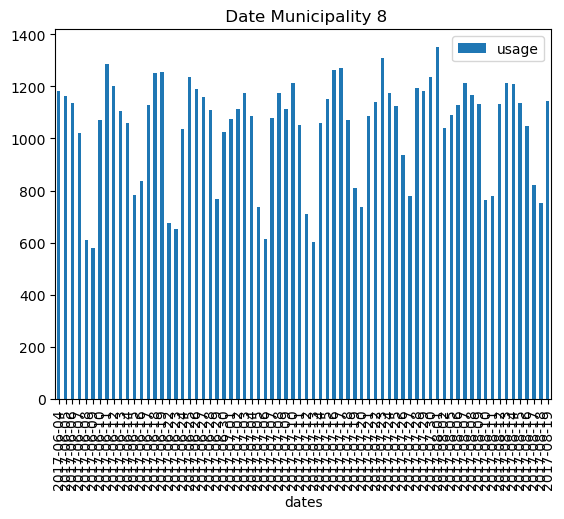

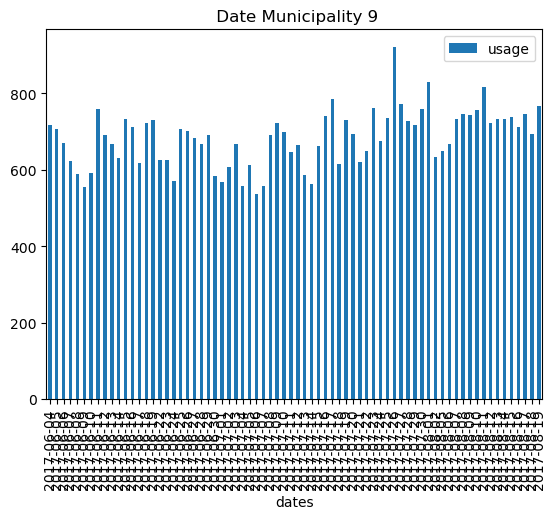

In [21]:
for name, group in grouped:
    newdf = df_new[(df_new.municipality_id == name)]
    newdf.groupby(['dates']).mean('usage').plot(kind='bar',y='usage',title=' Date Municipality '+str(name))
    #newdf.mean('usage').plot(kind='bar',x='weekday',y='usage')

In [22]:
df_new.isna().sum()

municipality_id      0
dates                0
hour                 0
usage              460
total_capacity     460
year               460
month              460
day                460
weekday            460
dtype: int64

In [23]:
#df['usage'].interpolate(method='polynomial', order=9)
#df['total_capacity'].interpolate(method='polynomial', order=9)

In [24]:
df_new['dates'] = pd.to_datetime(df_new['dates'])

In [25]:
df_new["usage"] = df_new["usage"].interpolate(method='polynomial', order=2)
df_new["total_capacity"] = df_new["total_capacity"].interpolate(method='polynomial', order=2)

In [26]:
#year	month	day	weekday	
df_new["year"] = df_new["dates"].dt.year
df_new["month"] = df_new["dates"].dt.month
df_new["day"] = df_new["dates"].dt.day
df_new["weekday"] = df_new["dates"].dt.weekday

## Part-2 Modelling

### DECOMPASITION

In [27]:
df_copy=df_new.copy()
df_decompasition=df_copy

In [28]:
df_decompasition.set_index('hour',inplace=True)
df_decompasition.index=pd.to_datetime(df_decompasition.index)

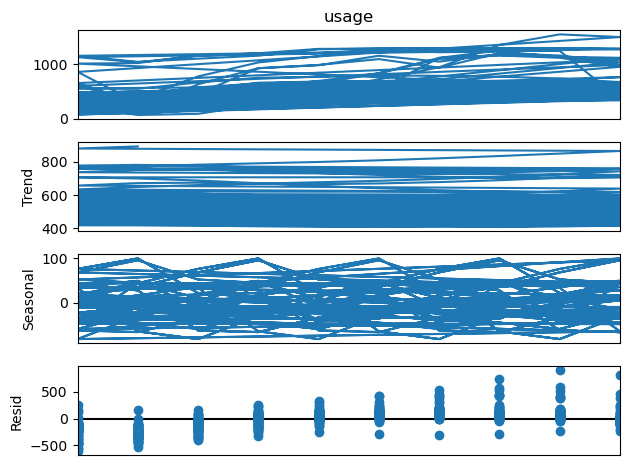

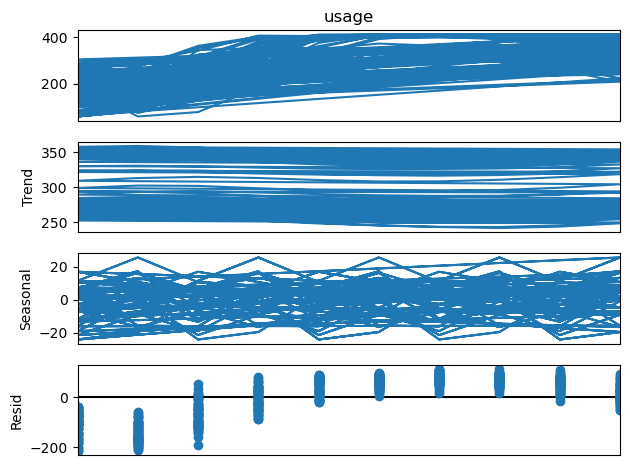

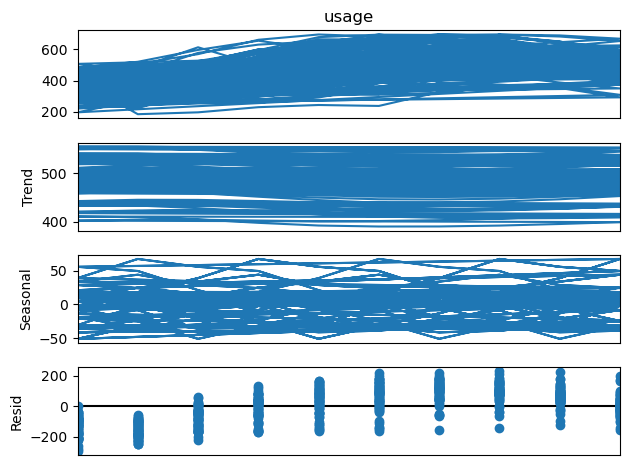

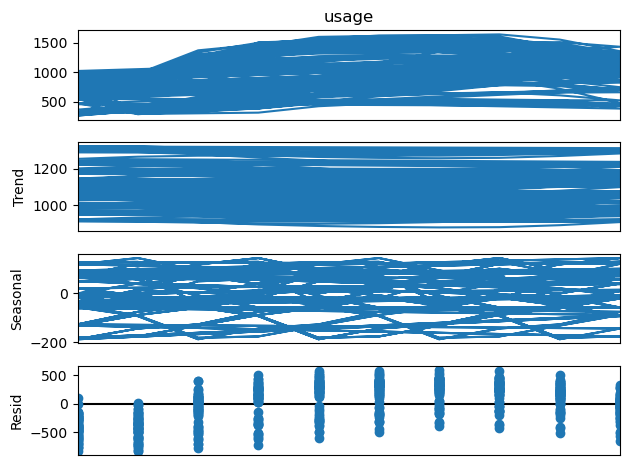

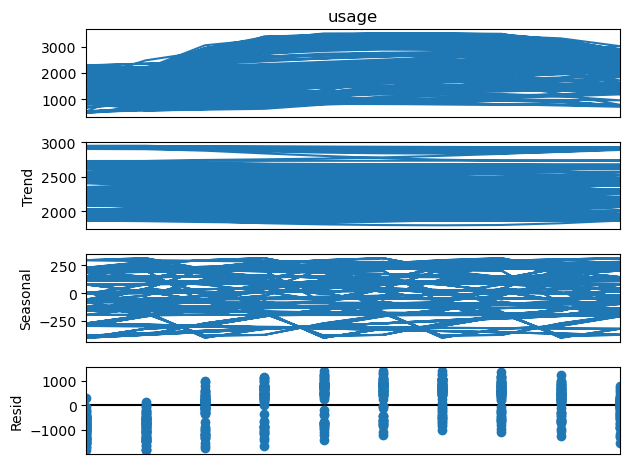

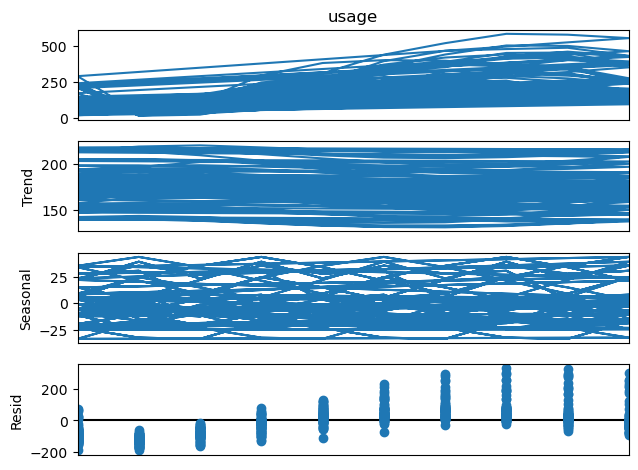

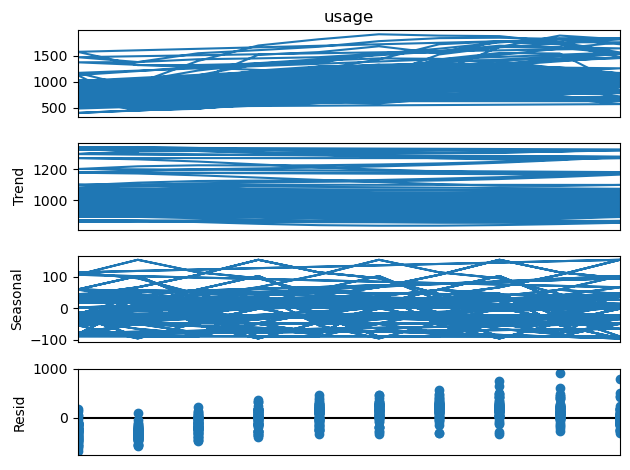

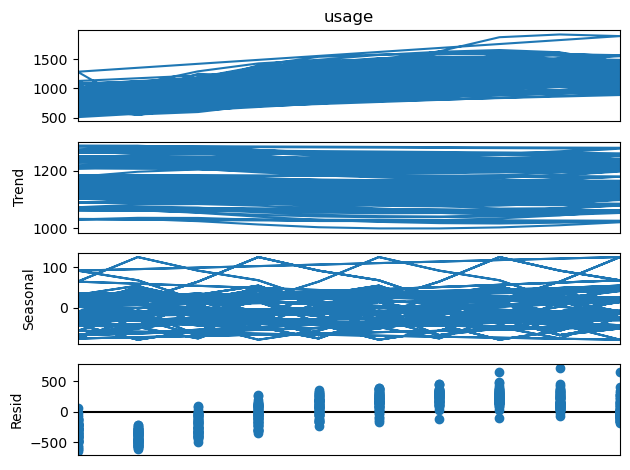

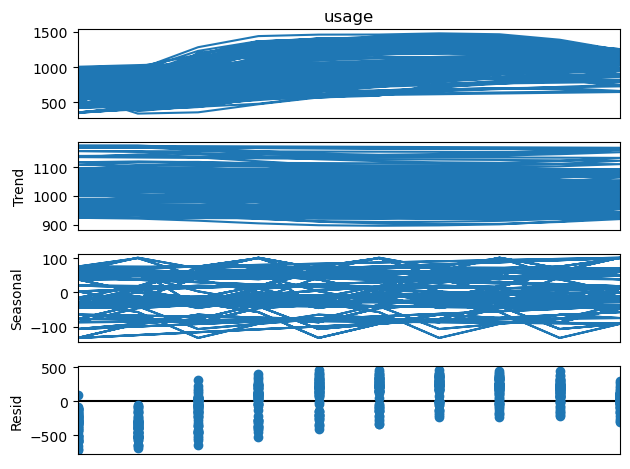

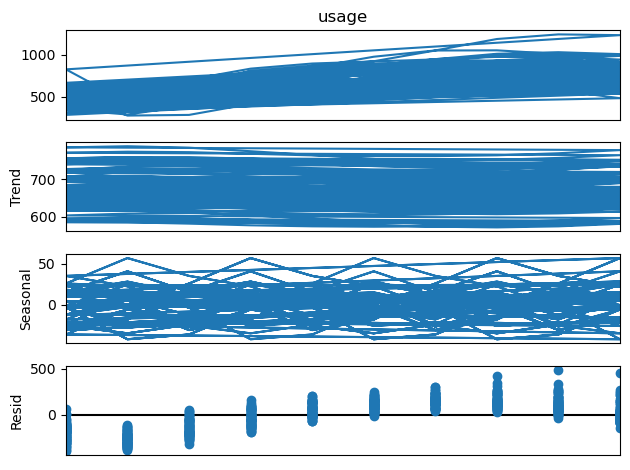

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
grouped_decompasition = df_decompasition.groupby('municipality_id')
for name, group in grouped_decompasition:
    newdf = df_decompasition[(df_decompasition.municipality_id == name)]
    result=seasonal_decompose(newdf['usage'], model='additive', period=56)
    result.plot()

### BASIC MODEL

In [30]:
df_new['dates'] = pd.to_datetime(df_new['dates'])

In [31]:
df_new['dates'].dt.isocalendar().week
df_new['week'] = df_new['dates'].dt.isocalendar().week

In [32]:
df_new.head()

,municipality_id,dates,hour,usage,total_capacity,year,month,day,weekday,week
0,0,2017-06-04,7,204.0,2813.0,2017,6,4,6,22
1,0,2017-06-04,8,332.0,2813.0,2017,6,4,6,22
2,0,2017-06-04,9,485.0,2813.0,2017,6,4,6,22
3,0,2017-06-04,10,583.0,2813.0,2017,6,4,6,22
4,0,2017-06-04,11,614.0,2813.0,2017,6,4,6,22


In [33]:
df_new['week'] = df_new['week'].astype('int')

In [34]:
df_new.dtypes

municipality_id          category
dates              datetime64[ns]
hour                        int64
usage                     float64
total_capacity            float64
year                        int64
month                       int64
day                         int64
weekday                     int64
week                        int64
dtype: object

In [35]:
def get_avg(df_new, municipality_id ,week, weekday, hour):
    # get year from index

    #df_week_hour = df.query('@week - 4 <= week < @week and municipality_id==@municipality_id and weekday==@weekday and hour == @hour')
    df_week_hour=(df_new['week'] >= week-4) & (df_new['week'] < week) & (df_new['municipality_id'] == municipality_id) & (df_new['weekday'] == weekday) & (df_new['hour'] == hour)
    subset=df_new.loc[df_week_hour]
    return subset['usage'].mean()

df_new['past_weeks_hourly_avg'] = df_new.apply(lambda x: get_avg(df_new, x['municipality_id'] ,x['week'], x['weekday'], x['hour']), axis=1)

In [36]:
test = (df_new['dates'] > '2017-08-04') & (df_new['dates'] <= '2017-08-19')

In [37]:
test_dataset=df_new.loc[test]

In [38]:
test_dataset.head()

,municipality_id,dates,hour,usage,total_capacity,year,month,day,weekday,week,past_weeks_hourly_avg
570,0,2017-08-05,7,419.593741,2813.0,2017,8,5,5,31,250.00
571,0,2017-08-05,8,252.000000,2813.0,2017,8,5,5,31,366.75
572,0,2017-08-05,9,393.000000,2813.0,2017,8,5,5,31,518.50
573,0,2017-08-05,10,517.000000,2813.0,2017,8,5,5,31,594.00
574,0,2017-08-05,11,653.000000,2813.0,2017,8,5,5,31,656.00


In [39]:
test_dataset['MAPE'] = test_dataset.apply(lambda row: abs(row.usage - row.past_weeks_hourly_avg)/(row.usage), axis=1)
test_dataset['MAPE'].mean()

/var/folders/z3/s039058d29vc7xtvpdjthx8r0000gn/T/ipykernel_90037/2800806092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dataset['MAPE'] = test_dataset.apply(lambda row: abs(row.usage - row.past_weeks_hourly_avg)/(row.usage), axis=1)


0.2012321338700422

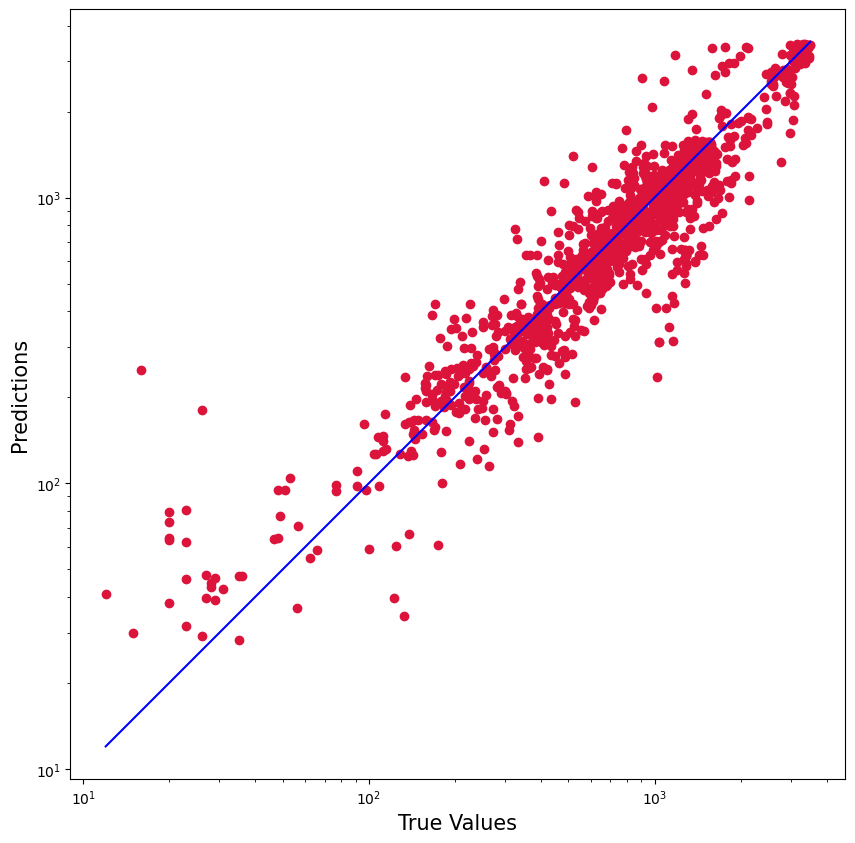

In [40]:
import matplotlib.pyplot as plt
true_value=test_dataset['usage']
predicted_value=test_dataset['past_weeks_hourly_avg']


plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### ARIMA MODEL

In [41]:
df_new['hour'] = pd.to_datetime(df_new['hour'], format='%H')
df_new['hour'] = df_new['hour'].dt.strftime("%H:%M:%S")

In [42]:
df_new.dtypes

municipality_id                category
dates                    datetime64[ns]
hour                             object
usage                           float64
total_capacity                  float64
year                              int64
month                             int64
day                               int64
weekday                           int64
week                              int64
past_weeks_hourly_avg           float64
dtype: object

In [43]:
df_new['time'] = pd.to_datetime(df_new['hour'], format='%H:%M:%S').dt.time

In [44]:
import datetime as dt
df_new['timestamp']=df_new.apply(lambda row: dt.datetime.combine(row.dates, row.time), axis=1)

In [45]:
df_new.dtypes

municipality_id                category
dates                    datetime64[ns]
hour                             object
usage                           float64
total_capacity                  float64
year                              int64
month                             int64
day                               int64
weekday                           int64
week                              int64
past_weeks_hourly_avg           float64
time                             object
timestamp                datetime64[ns]
dtype: object

In [46]:
test_2 = (df_new['dates'] > '2017-08-04') & (df_new['dates'] <= '2017-08-19')
test_dataset_2=df_new.loc[test_2]

In [47]:
train = (df_new['dates'] < '2017-08-05')
train_dataset=df_new.loc[train]

In [48]:
train_=train_dataset.iloc[:, [12,3]]
test_=test_dataset_2.iloc[:, [12,3]]

In [49]:
train_=train_.set_index('timestamp')

In [50]:
test_=test_.set_index('timestamp')

In [51]:
x_train=train_dataset['timestamp']
x_test=test_dataset_2['timestamp']

In [52]:
from pmdarima.arima import auto_arima
def arima_model(train,test):
    model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    prediction, confint = model.predict(n_periods=150, return_conf_int=True)

    #cf= pd.DataFrame(confint)
    #prediction_series = pd.Series(prediction,index=test.index)
    #fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    #ax.plot(data.Value)
    #ax.plot(prediction_series)
    #ax.fill_between(prediction_series.index,
    #            cf[0],
    #            cf[1],color='grey',alpha=.3)
    return(prediction)

def calcmape(actual, forecast):
    return 1/len(actual) * np.sum(np.abs(forecast-actual) / (np.abs(actual)))

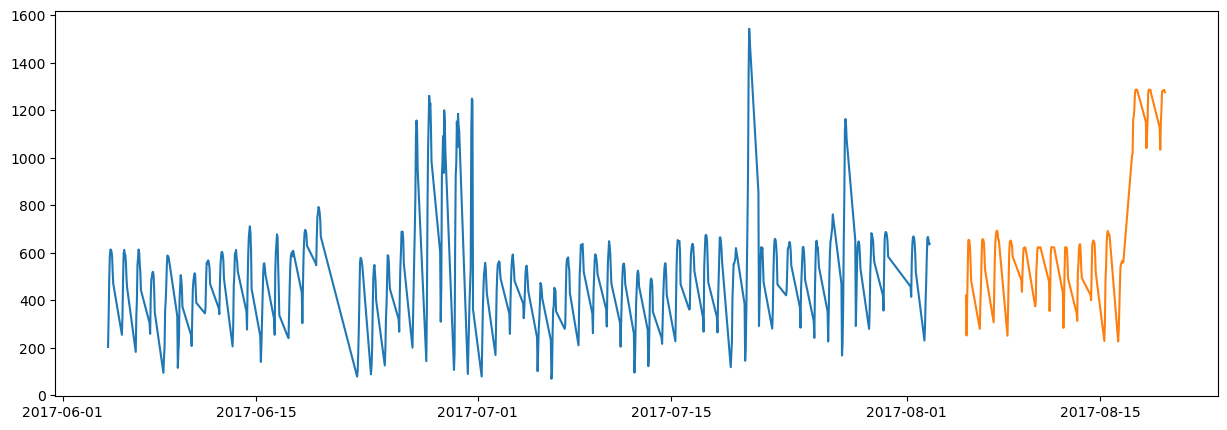

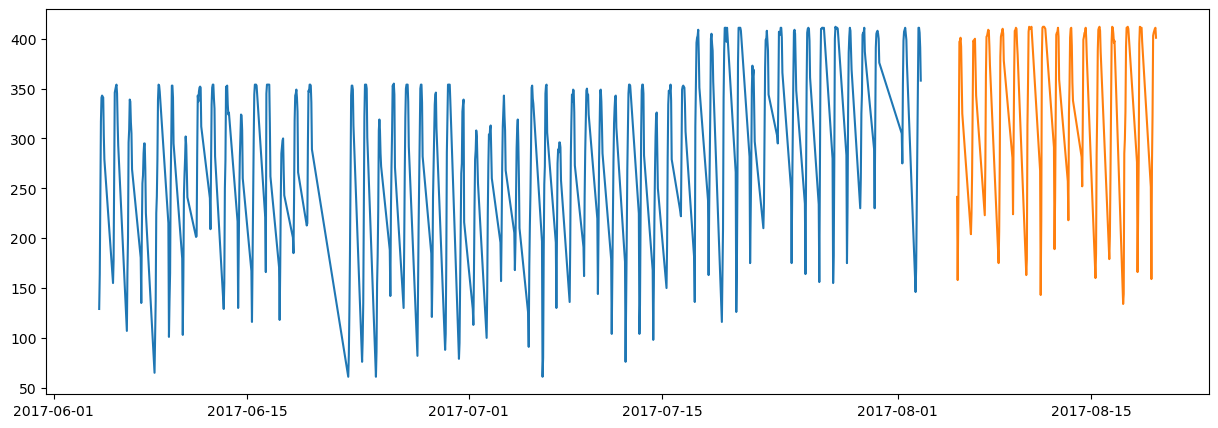

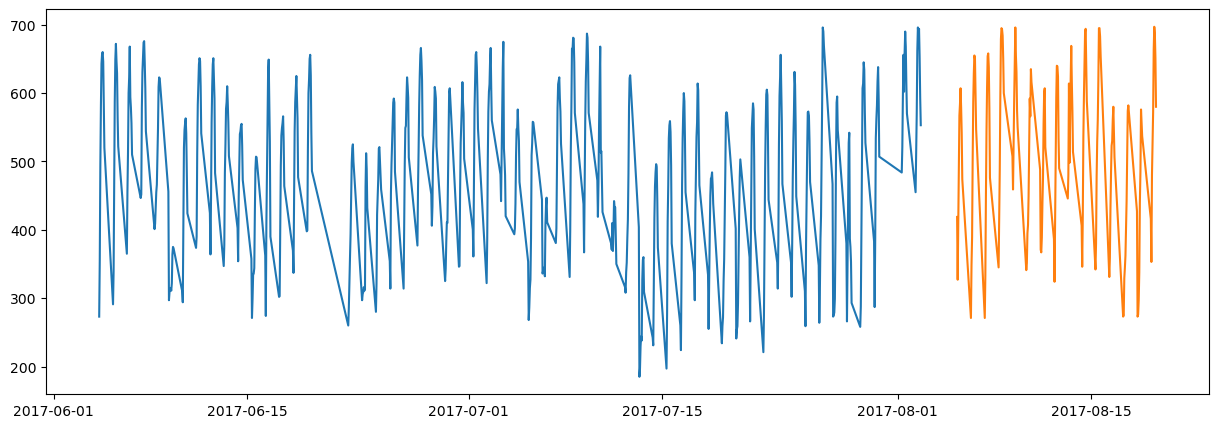

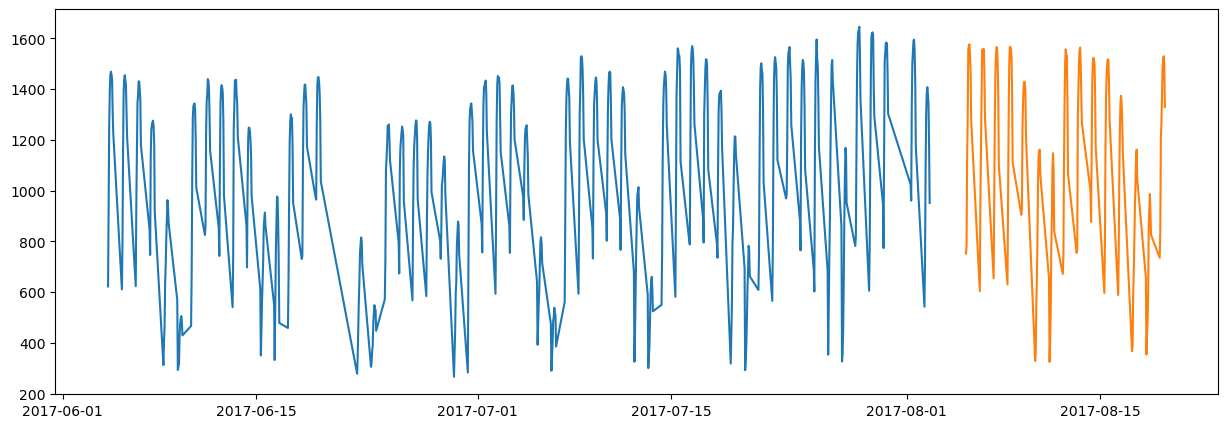

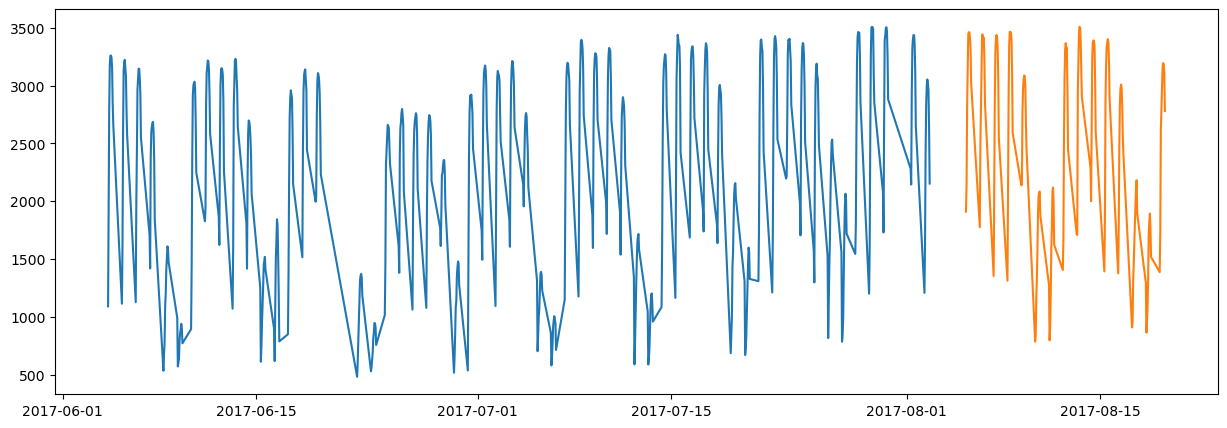

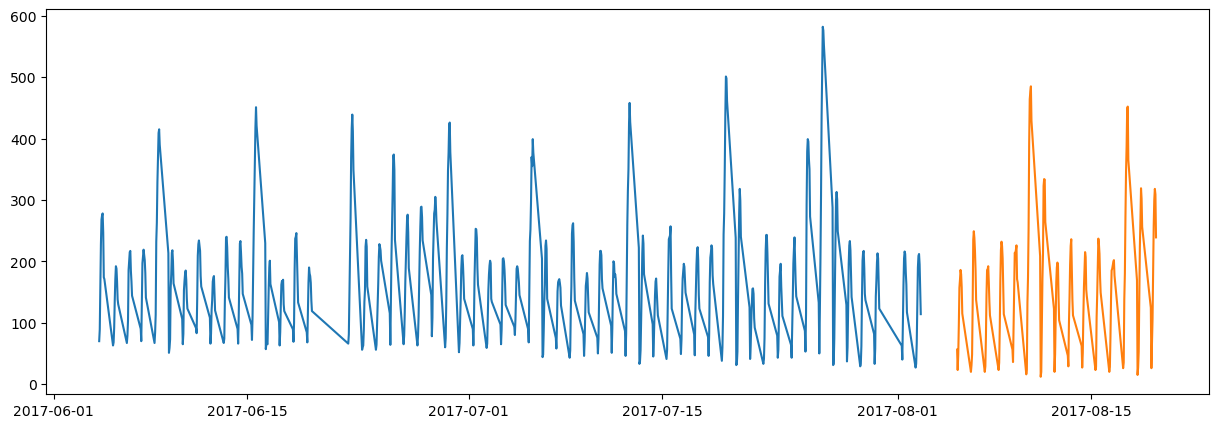

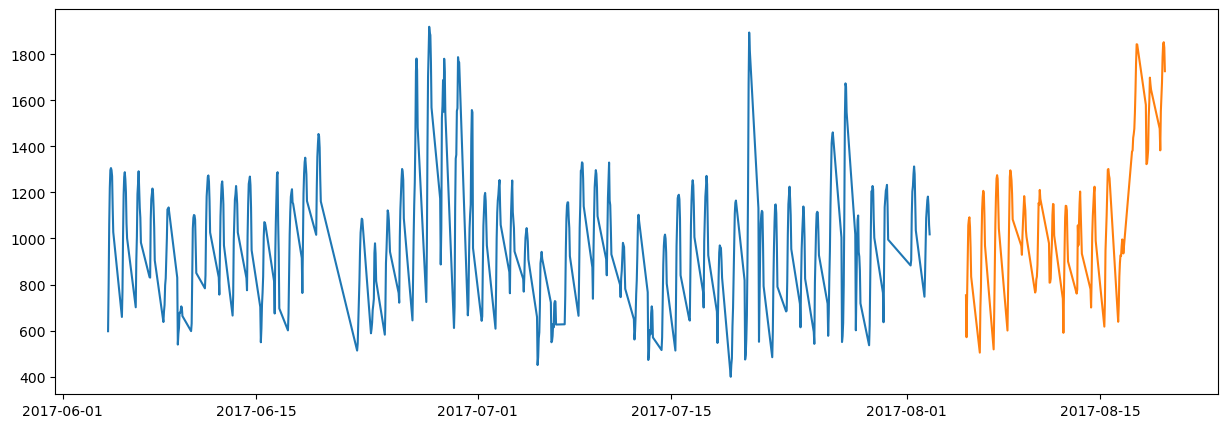

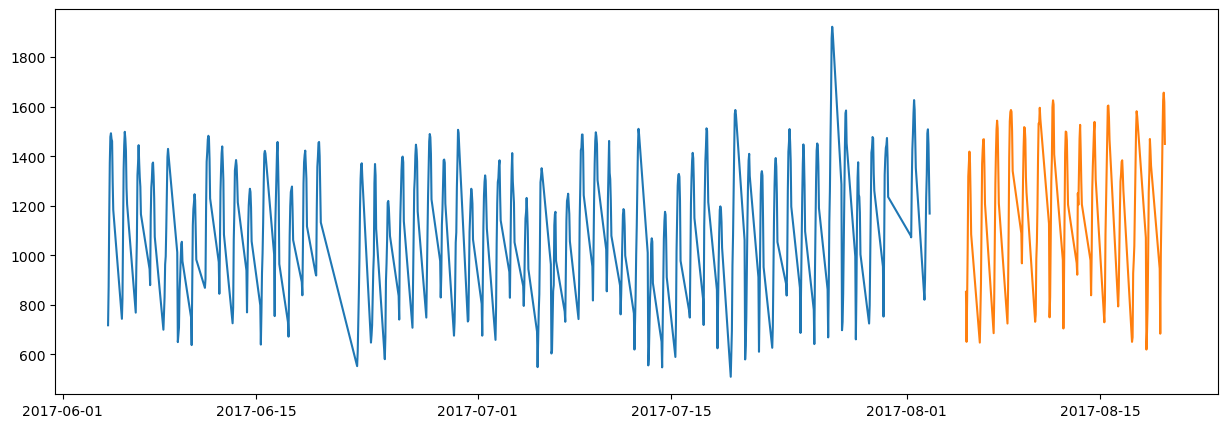

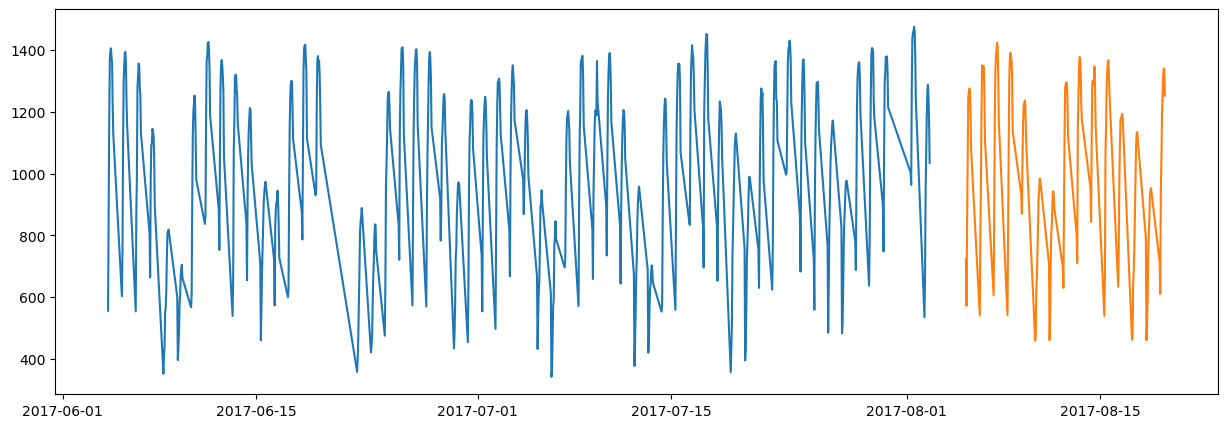

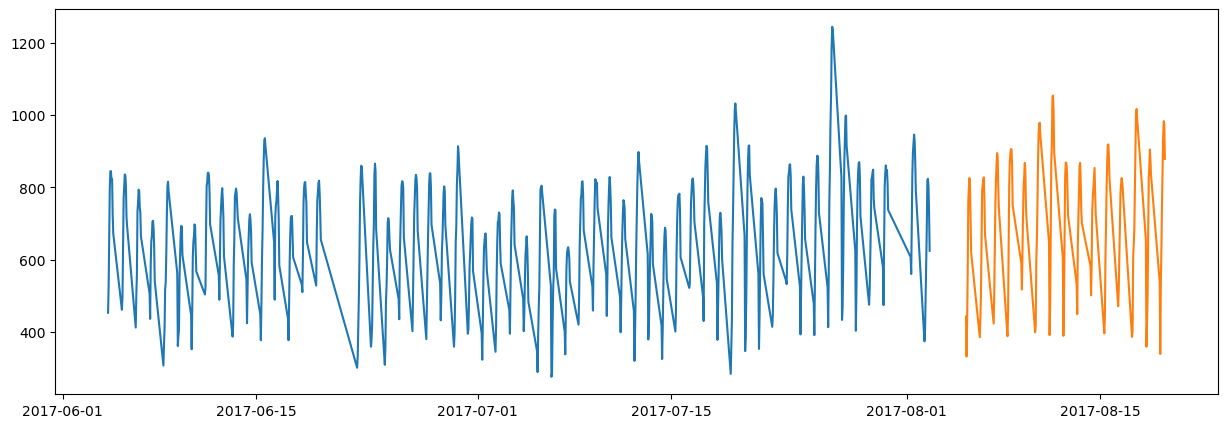

In [53]:
grouped = df_new.groupby('municipality_id')

for name, group in grouped:
    newdf = df_new[(df_new.municipality_id == name)]
    test_func = (newdf['dates'] > '2017-08-04') & (newdf['dates'] <= '2017-08-19')
    test_dataset_func=newdf.loc[test_func]
    train_func = (newdf['dates'] < '2017-08-05')
    train_dataset_func=newdf.loc[train_func]
    train_f=train_dataset_func.iloc[:, [12,3]]
    test_f=test_dataset_func.iloc[:, [12,3]]
    train_f=train_f.set_index('timestamp')
    test_f=test_f.set_index('timestamp')
    x_train_f=train_dataset_func['timestamp']
    x_test_f=test_dataset_func['timestamp']
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(x_train_f, train_f)
    ax.plot(x_test_f, test_f)

In [54]:
grouped = df_new.groupby('municipality_id')
a=[]

for name, group in grouped:
    newdf = df_new[(df_new.municipality_id == name)]
    test_func = (newdf['dates'] > '2017-08-04') & (newdf['dates'] <= '2017-08-19')
    test_dataset_func=newdf.loc[test_func]
    train_func = (newdf['dates'] < '2017-08-05')
    train_dataset_func=newdf.loc[train_func]
    train_f=train_dataset_func.iloc[:, [12,3]]
    test_f=test_dataset_func.iloc[:, [12,3]]
    train_f=train_f.set_index('timestamp')
    test_f=test_f.set_index('timestamp')
    x_train_f=train_dataset_func['timestamp']
    x_test_f=test_dataset_func['timestamp']
    prediction=arima_model(train_f,test_f)
    mape_municipality=calcmape(test_f.values ,prediction.values)
    a.append(mape_municipality)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7231.074, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7292.896, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7238.228, Time=0.02 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7230.338, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7290.911, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7228.274, Time=0.12 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7123.201, Time=0.21 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7100.655, Time=0.50 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7054.196, Time=0.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7056.593, Time=0.37 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=7025.394, Time=0.56 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=7102.133, Time=0.47 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=7050.293, Time=0.68 sec
 ARIMA(2,1,5)(0,0,0)[0] intercept   : AIC=6985.035, Time=0.83 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,1,5)(0,0,0)[0] intercept   : AIC=6987.177, Time=0.79 sec
 ARIMA(2,1,5)(0,0,0)[0]             : AIC=inf, Time=0.63 sec

Best model:  ARIMA(2,1,5)(0,0,0)[0] intercept
Total fit time: 7.388 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6211.570, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6309.189, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6231.947, Time=0.03 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in recipro

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6210.227, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6307.214, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6210.905, Time=0.11 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduce

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6208.233, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6209.576, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6208.910, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6229.957, Time=0.02 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6090.906, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5948.249, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6001.762, Time=0.12 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,2)(0,0,0)[0]             : AIC=5999.754, Time=0.33 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=5945.171, Time=0.31 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=6060.111, Time=0.35 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=inf, Time=0.61 sec
 ARIMA(2,1,4)(0,0,0)[0]             : AIC=5823.852, Time=0.55 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,4)(0,0,0)[0]             : AIC=6056.279, Time=0.25 sec
 ARIMA(3,1,4)(0,0,0)[0]             : AIC=5816.990, Time=0.62 sec
 ARIMA(4,1,4)(0,0,0)[0]             : AIC=5766.911, Time=0.52 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=5950.922, Time=0.45 sec
 ARIMA(5,1,4)(0,0,0)[0]             : AIC=5756.495, Time=0.56 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(5,1,5)(0,0,0)[0]             : AIC=5784.588, Time=0.64 sec
 ARIMA(4,1,5)(0,0,0)[0]             : AIC=5797.251, Time=0.75 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=5757.951, Time=0.81 sec

Best model:  ARIMA(5,1,4)(0,0,0)[0]          
Total fit time: 8.823 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6333.304, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6491.185, Time=0.01 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in recipro

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6357.918, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6339.087, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6489.212, Time=0.01 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6179.857, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6316.044, Time=0.04 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6176.899, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6300.101, Time=0.13 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6156.737, Time=0.43 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6269.819, Time=0.19 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=6140.972, Time=0.55 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=6235.326, Time=0.10 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=6106.932, Time=0.67 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6128.123, Time=0.58 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=6128.905, Time=0.74 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=6086.488, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6140.011, Time=0.56 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=6140.229, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=6134.171, Time=0.90 sec
 ARIMA(4,1,3)(0,0,0)[0]             : AIC=6085.686, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0]             : AIC=6138.066, Time=0.30 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=6126.160, Time=0.39 sec
 ARIMA(5,1,3)(0,0,0)[0]             : AIC=6126.195, Time=0.55 sec
 ARIMA(4,1,4)(0,0,0)

/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in recipro

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7568.912, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7543.041, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7658.673, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7542.506, Time=0.11 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7541.712, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7458.301, Time=0.38 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7456.317, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7526.114, Time=0.04 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7458.311, Time=0.37 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7519.797, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7459.751, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7454.320, Time=0.14 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7541.633, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7524.106, Time=0.03 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0]             : AIC=7456.314, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7456.304, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7566.916, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7539.709, Time=0.16 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(3,1,0)(0,0,0)[0]             : AIC=7517.787, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=7457.754, Time=0.26 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0]          
Total fit time: 3.414 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8476.378, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8575.073, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8498.403, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8474.679, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8573.083, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8476.563, Time=0.05 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in recipro

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8472.664, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8474.364, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=8474.551, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8496.395, Time=0.02 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.073 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6035.084, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6239.287, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6054.358, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6061.314, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6237.288, Time=0.01 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6023.481, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6025.217, Time=0.23 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6021.477, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6059.312, Time=0.04 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=6023.217, Time=0.14 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6033.082, Time=0.07 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in recipro

 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.45 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 2.927 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7346.958, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7459.779, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7361.756, Time=0.04 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7350.705, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7457.789, Time=0.01 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7207.208, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7329.395, Time=0.05 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7202.678, Time=0.38 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7304.757, Time=0.07 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7196.513, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=7295.807, Time=0.08 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=7162.650, Time=0.62 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=7252.650, Time=0.11 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=7112.955, Time=0.71 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7199.055, Time=0.59 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=7119.797, Time=0.84 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=7171.676, Time=0.77 sec
 ARIMA(5,1,2)(0,0,0)[0]             : AIC=7113.305, Time=0.47 sec

Best model:  ARIMA(5,1,2)(0,0,0)[0] intercept
Total fit time: 5.704 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7341.877, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7505.692, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7367.614, Time=0.02 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in recipro

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7350.616, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7503.705, Time=0.01 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7336.478, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7335.527, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7333.523, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7348.613, Time=0.05 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7334.479, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=7265.696, Time=0.20 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=inf, Time=0.20 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in recipro

 ARIMA(1,1,4)(0,0,0)[0]             : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 2.757 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7437.894, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7511.361, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7454.097, Time=0.07 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7435.801, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7509.375, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7437.770, Time=0.17 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduce

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7433.797, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7435.879, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7435.778, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7452.108, Time=0.02 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.070 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6809.754, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6964.738, Time=0.01 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6832.823, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6817.881, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6962.743, Time=0.01 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6803.636, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6803.169, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6801.166, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6815.877, Time=0.04 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6801.636, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=6724.449, Time=0.17 sec


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=inf, Time=0.33 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0]          
Total fit time: 2.630 seconds


/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Applications/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [55]:
a

[52.191215576235315,
 42.39917492778028,
 43.95457817109181,
 55.96341646478696,
 53.19717667395736,
 132.08516546726554,
 34.47104340677287,
 34.40741737459146,
 41.58713972019959,
 37.39049573908865]

In [56]:
np.mean(a)

52.76468235217699

### SVM REGRESSOR

In [57]:
test_svm = (df_new['dates'] > '2017-08-04') & (df_new['dates'] <= '2017-08-19')
test_dataset_svm=df_new.loc[test_2]
train_svm = (df_new['dates'] < '2017-08-05')
train_dataset_svm=df_new.loc[train]

In [58]:
test_dataset_svm=test_dataset_svm.drop(['time', 'dates','timestamp','past_weeks_hourly_avg','year'], axis=1)
train_dataset_svm=train_dataset_svm.drop(['time','dates' ,'timestamp','past_weeks_hourly_avg','year'], axis=1)

In [59]:
one_hot = pd.get_dummies(test_dataset_svm['municipality_id'])
# Drop column municipality_id as it is now encoded
test_dataset_svm = test_dataset_svm.drop('municipality_id',axis = 1)
# Join the encoded test_dataset_svm
test_dataset_svm = test_dataset_svm.join(one_hot)
test_dataset_svm 

,hour,usage,total_capacity,month,day,weekday,week,0,1,2,3,4,5,6,7,8,9
570,07:00:00,419.593741,2813.0,8,5,5,31,1,0,0,0,0,0,0,0,0,0
571,08:00:00,252.000000,2813.0,8,5,5,31,1,0,0,0,0,0,0,0,0,0
572,09:00:00,393.000000,2813.0,8,5,5,31,1,0,0,0,0,0,0,0,0,0
573,10:00:00,517.000000,2813.0,8,5,5,31,1,0,0,0,0,0,0,0,0,0
574,11:00:00,653.000000,2813.0,8,5,5,31,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,12:00:00,849.000000,1332.0,8,19,5,33,0,0,0,0,0,0,0,0,0,1
7196,13:00:00,941.000000,1332.0,8,19,5,33,0,0,0,0,0,0,0,0,0,1
7197,14:00:00,983.000000,1332.0,8,19,5,33,0,0,0,0,0,0,0,0,0,1
7198,15:00:00,976.000000,1332.0,8,19,5,33,0,0,0,0,0,0,0,0,0,1


In [60]:
one_hot_2 = pd.get_dummies(train_dataset_svm['municipality_id'])
# Drop column municipality_id as it is now encoded
train_dataset_svm = train_dataset_svm.drop('municipality_id',axis = 1)
# Join the encoded test_dataset_svm
train_dataset_svm = train_dataset_svm.join(one_hot_2)
train_dataset_svm

,hour,usage,total_capacity,month,day,weekday,week,0,1,2,3,4,5,6,7,8,9
0,07:00:00,204.0,2813.0,6,4,6,22,1,0,0,0,0,0,0,0,0,0
1,08:00:00,332.0,2813.0,6,4,6,22,1,0,0,0,0,0,0,0,0,0
2,09:00:00,485.0,2813.0,6,4,6,22,1,0,0,0,0,0,0,0,0,0
3,10:00:00,583.0,2813.0,6,4,6,22,1,0,0,0,0,0,0,0,0,0
4,11:00:00,614.0,2813.0,6,4,6,22,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,12:00:00,819.0,1332.0,8,2,2,31,0,0,0,0,0,0,0,0,0,1
7046,13:00:00,824.0,1332.0,8,2,2,31,0,0,0,0,0,0,0,0,0,1
7047,14:00:00,803.0,1332.0,8,2,2,31,0,0,0,0,0,0,0,0,0,1
7048,15:00:00,730.0,1332.0,8,2,2,31,0,0,0,0,0,0,0,0,0,1


In [61]:
#turning to integer again for svm
train_dataset_svm['hour'] = pd.to_datetime(train_dataset_svm['hour']).dt.hour
test_dataset_svm['hour'] = pd.to_datetime(test_dataset_svm['hour']).dt.hour

In [62]:
X_train = train_dataset_svm[['hour','total_capacity','month','day','weekday','week',0,1,2,3,4,5,6,7,8,9]]
X_test = test_dataset_svm[['hour','total_capacity','month','day','weekday','week',0,1,2,3,4,5,6,7,8,9]]
y_train = train_dataset_svm['usage']
y_test = test_dataset_svm['usage']

In [63]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [64]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train) 

SVR(kernel='linear')

In [65]:
svr_linear.score(X_test,y_test)

0.6589246239873646

creating a linear baseline

In [66]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [67]:
linear.fit(X_train,y_train)

LinearRegression()

In [68]:
linear.score(X_test,y_test)

0.7881544678230422

Support vector regressor with Gaussian (radial basis function) kernel

In [69]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(X_train, y_train) 

SVR()

In [70]:
svr_rbf.score(X_test,y_test)

0.25812542864707244

In [71]:
from sklearn.metrics import mean_absolute_percentage_error

In [72]:
print("MAPE for linear SVR:",np.sqrt(mean_absolute_percentage_error(y_test,svr_linear.predict(X_test))))
print("MAPE for RBF kernelized SVR:",np.sqrt(mean_absolute_percentage_error(y_test,svr_rbf.predict(X_test))))

MAPE for linear SVR: 0.539021360638659
MAPE for RBF kernelized SVR: 0.8609296667976333


Linear works better for this case. The first basic model works better with a 20% error compared to the advanced models. Probably the reason is the advanced model needs optimization with the parameters. To make this model more efficient we need to focus on selecting more appropriate results.